##### top

# This notebook verifies statistical dependence or independence of several measures that are claimed in the paper

* [Random data show no reliability](#Random-data-show-no-reliability)

## Random data show no reliability
[top](#top)

This shows what is stated in Figure 1 that random data have no reliability and the observed reliability can fluctuate between -0.1 to 0.1.

In [1]:
import os,sys
import scipy
import time
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

from lmfit import Model

# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)


### Functions
from reliability_functions import create_random_reliability_curve, linear
from plot_functions import plot_figure_convergent_tasks_random


path_results = "../Data/results" 
path_curve_fit = os.path.join(path_results, "curve_fits")
path_simulation_general = os.path.join(path_curve_fit, "compare_fitting_methods")

In [2]:
start = time.time()

# how many times to sample
n_sims = 100

# define the simulation
total_n_trials_n = 250
# subjects
N_n=100

array_corr_trials_psychofit_all = np.zeros((n_sims, 25, 1000))

for i in range(n_sims):
    array_corr_trials_psychofit_all[i,:], n_trials_list_n = create_random_reliability_curve(total_n_trials_n, N_n,
                                                                             rng=np.random.default_rng(i),
                                                                             rng_split=np.random.default_rng(0),
                                                                            print_time=False,verbose=False)

print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")
# 4.6 s per 1 iter
# 46.6 s per 10 (0.8 min)
# 445 s per 100 (7.4 min)

/Users/jan/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jan/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Process took: 536.76 s which is 8.95 min.


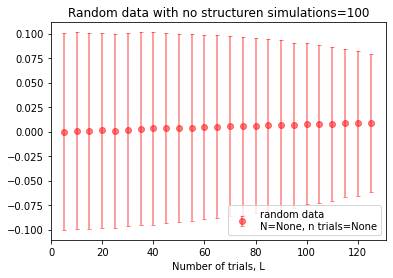


Statistical tests:
Ttest_1sampResult(statistic=1.1659805836168462, pvalue=0.24642362500678136)
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  1.165981   99   two-sided  0.246424  [-0.01, 0.02]  0.116598  0.214   

           power  
T-test  0.211251  
(100,)


In [4]:
fig, ax = plt.subplots(1,1)

plot_figure_convergent_tasks_random(n_trials_list_n, array_corr_trials_psychofit_all.mean(axis=-1).mean(0), 
                                    array_corr_trials_psychofit_all.std(axis=-1).mean(0), ax, False, colour='r')

ax.set_title(ax.get_title()+f'n simulations={n_sims}')
plt.show()

print('\nStatistical tests:')
print(scipy.stats.ttest_1samp(array_corr_trials_psychofit_all.mean(axis=-1)[:,-1], 0, alternative='two-sided'))
print(pg.ttest(array_corr_trials_psychofit_all.mean(axis=-1)[:,-1], 0, alternative='two-sided'))
print(array_corr_trials_psychofit_all.mean(axis=-1)[:,-1].shape)

## Median percent error for fits is independent of C
[top](#top)

This shows what is stated in Figure 4 that median percent error for the three fits is independent of C. This is hard to show and we show it in the two following ways:
* by looking at the distribution of differences of neighbouring points (i.e., second-first, third-second, ...) and testing whether it is significantly different from zero (if no, then there is no trend);
* by fitting a linear function and looking at its slope (should be 0 if there is no trend).

In [2]:
import pingouin as pg
df_perc_median_noexplosions = pd.read_csv(os.path.join(path_simulation_general, 'beta_simulate_N_ntrials250', 'df_perc_median_noexplosions_varyN_ntrials_250_unbiasedC_between_1-100.csv'))



/Users/jan/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jan/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


hyperbolic
Ttest_1sampResult(statistic=0.23014306685144725, pvalue=0.8185909176354855)
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.230143   77   two-sided  0.818591  [-0.04, 0.05]  0.026059  0.128   

           power  
T-test  0.055939  
(78,) -> df = 77
{'a': 0.001918812002343358, 'b': -0.016816872295820594} 

linear
Ttest_1sampResult(statistic=0.8177722286074622, pvalue=0.4160106269896444)
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.817772   77   two-sided  0.416011  [-0.03, 0.08]  0.092594  0.172   

           power  
T-test  0.127411  
(78,) -> df = 77
{'a': 0.009249488234733884, 'b': 0.5813890229487646} 

theory_unbiased
Ttest_1sampResult(statistic=0.5876920500570691, pvalue=0.5584586093377233)
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.587692   77   two-sided  0.558459  [-0.03, 0.06]  0.066543  0.147   

           power  
T-test  0.089396  
(7

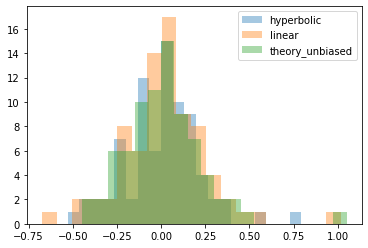

In [3]:
my_N = 100

for i,fit_hue in enumerate(["hyperbolic", "linear", "theory_unbiased"]):
    data=df_perc_median_noexplosions.loc[(df_perc_median_noexplosions["fit"]==fit_hue)&(df_perc_median_noexplosions["N"]==my_N)&(df_perc_median_noexplosions["true_C"]>=2)]
    diff = data.loc[:, "percent_error"][1:].values-data.loc[:, "percent_error"][:-1].values
    plt.hist(diff, bins=20, alpha=0.4, label=fit_hue)
    plt.legend()
    print(fit_hue)
    print(scipy.stats.ttest_1samp(diff, 0, alternative='two-sided'))
    print(pg.ttest(diff, 0, alternative='two-sided'))
    print(f'{diff.shape} -> df = {diff.shape[0] - 1}')

    gmodel = Model(linear, nan_policy='omit')
    params = gmodel.make_params(a=0, b=0)
    result = gmodel.fit(data.loc[:, "percent_error"], params, x=data.loc[:, "true_C"])
    print(result.best_values, '\n')

In [5]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu -iv

Author: Jan Kadlec

Last updated: Sat May 25 2024

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 23.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

matplotlib: 3.6.2
scipy     : 1.7.3
sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
numpy     : 1.19.1
pandas    : 1.2.4
pingouin  : 0.5.1



[top](#top)